<a href="https://colab.research.google.com/github/leonbenenati/Projeto/blob/main/Word_Cloud_e_analise_de_sentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Projeto de analíse de um dataset do Twitter
##Foi feito uma nuvem de palavras para cada sentimento e em seguida um modelo para analíse de sentimento 

## Careegando do pacotes e pré processamento de dados

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('/content/covid_tweets.csv',encoding='latin1')

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
 pip install langdetect 

In [ ]:
#Para verificar o dioma de cada tweet
from langdetect import detect_langs
lingua = [] 

for row in range(len(df)):
    lingua.append(detect_langs(df.iloc[row, 5]))
   
lingua = [str(lin).split(':')[0][1:] for lin in lingua]


df['lingua'] = lingua

print(df.head())

   UserName  ScreenName  ...           Sentiment lingua
0      3799       48751  ...             Neutral     de
1      3800       48752  ...            Positive     pt
2      3801       48753  ...            Positive     pt
3      3802       48754  ...            Positive     pt
4      3803       48755  ...  Extremely Negative     en

[5 rows x 7 columns]


In [ ]:
#Caculando o número de palavras em cada tweet
# Tokenizando cada item
word_tokens = [word_tokenize(df) for df in df.OriginalTweet]

# tokens do primeiro tweet
print(word_tokens[0])

len_tokens = []

# loop for sobre a lista de word_tokens e determiando o cumprimento  
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

#nova coluna com os número de palavras
df['n_word'] = len_tokens

df.head()

['@', 'MeNyrbie', '@', 'Phil_Gahan', '@', 'Chrisitv', 'https', ':', '//t.co/iFz9FAn2Pa', 'and', 'https', ':', '//t.co/xX6ghGFzCC', 'and', 'https', ':', '//t.co/I2NlzdxNo8']


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,lingua,n_word
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,de,17
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,pt,38
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,pt,18
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,pt,58
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,en,58


In [ ]:
df["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
#Será retirado o ext pois apeas um dado
index = df[df['Sentiment'] =='Ext' ].index
df.drop(index , inplace=True)

In [ ]:
df["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

# Visualização de dados

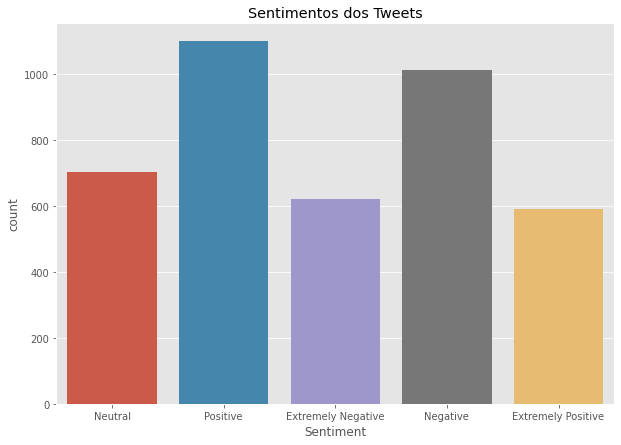

In [ ]:
#Gráfico da contagem de sentimento
import seaborn as sns


plt.figure(figsize=(10,7))
plt.title("Sentimentos dos Tweets")
plt.style.use('ggplot')
sns.countplot(x=df["Sentiment"])

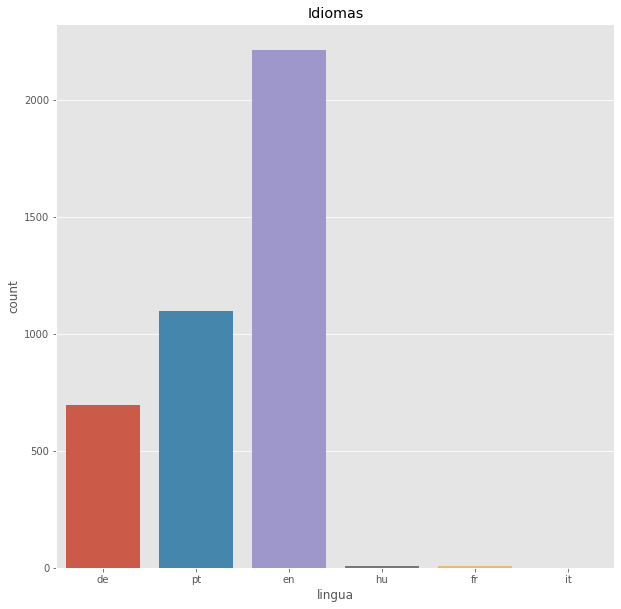

In [ ]:
#Gráfico da contagem de idioma
import seaborn as sns
plt.figure(figsize=(10,10))
plt.title("Idiomas")
plt.style.use('ggplot')
sns.countplot(x=df["lingua"])

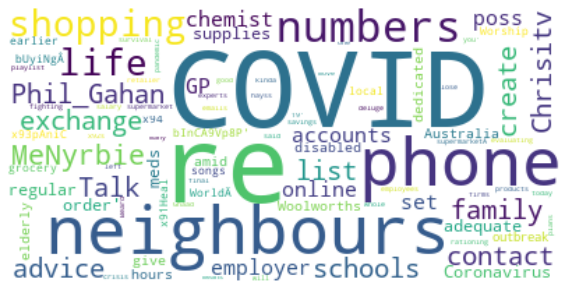

In [ ]:
#Criando nuvem de palavra
plt.figure(figsize=(10,10))
texto = df["OriginalTweet"].values 
meus_stop = STOPWORDS.update(['@','https','co',"ifz9fan2pa","i2nlzdxno8","xx6ghgfzcc","i2nlzdxno8","x92"])

#Gerando nuvem de palavras e tirando as stop words com a váriavel meus_stop
nuvem_total = WordCloud(background_color="white",stopwords=meus_stop).generate(str(texto))

#criando a imagem
plt.imshow(nuvem_total, interpolation='bilinear')  
plt.axis('off')
#mostrando
plt.show()

In [ ]:
#Será criada nuvem de palavras para cada sentimento específico
df_neutro=df.loc[df['Sentiment'] == 'Neutral']
df_positivo	=df.loc[df['Sentiment'] == 'Positive']
df_negativo	=df.loc[df['Sentiment'] == 'Negative']
df_exnegativo=df.loc[df['Sentiment'] == 'Extremely Negative']
df_expositivo	=df.loc[df['Sentiment'] == 'Extremely Positive']

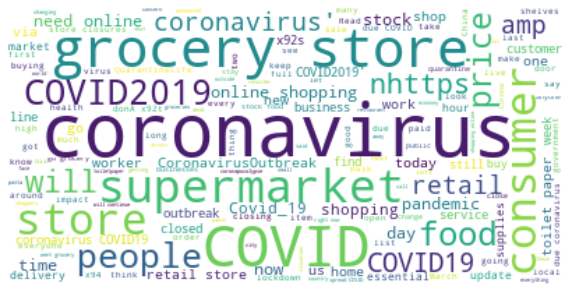

In [ ]:
plt.figure(figsize=(10,10))
texto = df_neutro["OriginalTweet"].values 
meus_stop = STOPWORDS.update(['@','https','co',"ifz9fan2pa","i2nlzdxno8","xx6ghgfzcc","i2nlzdxno8","x92"])

nuvem_total = WordCloud(background_color="white",stopwords=meus_stop).generate(str(texto))


plt.imshow(nuvem_total, interpolation='bilinear')  
plt.axis('off')
plt.show()

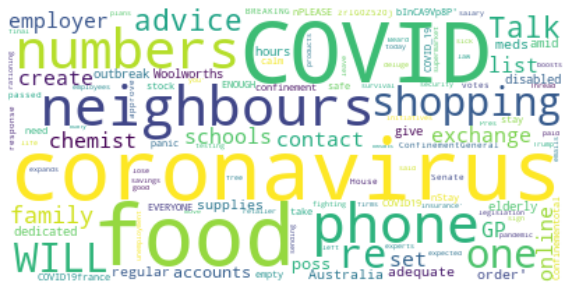

In [ ]:
plt.figure(figsize=(10,10))
texto = df_positivo["OriginalTweet"].values 
meus_stop = STOPWORDS.update(['@','https','co',"ifz9fan2pa","i2nlzdxno8","xx6ghgfzcc","i2nlzdxno8","x92"])


nuvem_total = WordCloud(background_color="white",stopwords=meus_stop).generate(str(texto))


plt.imshow(nuvem_total, interpolation='bilinear')  
plt.axis('off')
plt.show()

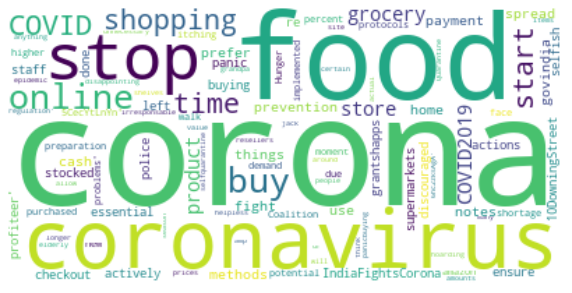

In [ ]:
plt.figure(figsize=(10,10))
texto = df_negativo["OriginalTweet"].values 
meus_stop = STOPWORDS.update(['@','https','co',"ifz9fan2pa","i2nlzdxno8","xx6ghgfzcc","i2nlzdxno8","x92"])

nuvem_total = WordCloud(background_color="white",stopwords=meus_stop).generate(str(texto))


plt.imshow(nuvem_total, interpolation='bilinear')  
plt.axis('off')
plt.show()

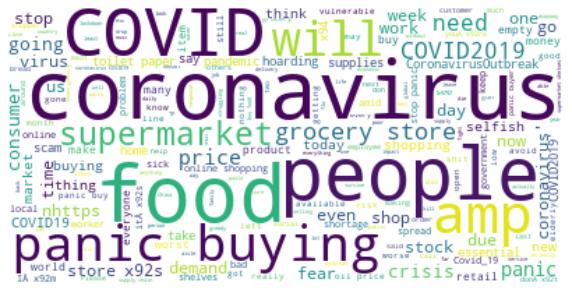

In [ ]:
plt.figure(figsize=(10,10))
texto = df_exnegativo["OriginalTweet"].values 
meus_stop = STOPWORDS.update(['@','https','co',"ifz9fan2pa","i2nlzdxno8","xx6ghgfzcc","i2nlzdxno8","x92"])


nuvem_total = WordCloud(background_color="white",stopwords=meus_stop).generate(str(texto))

plt.imshow(nuvem_total, interpolation='bilinear')  
plt.axis('off')
plt.show()

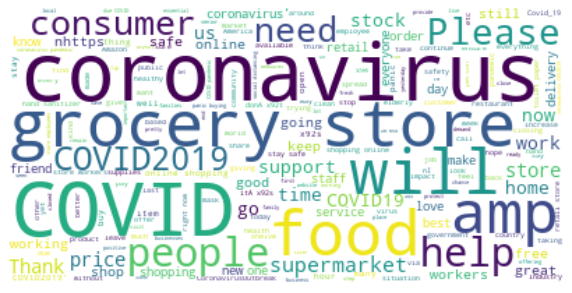

In [ ]:
plt.figure(figsize=(10,10))
texto = df_expositivo["OriginalTweet"].values 
meus_stop = STOPWORDS.update(['@','https','co',"ifz9fan2pa","i2nlzdxno8","xx6ghgfzcc","i2nlzdxno8","x92"])

nuvem_total = WordCloud(background_color="white",stopwords=meus_stop).generate(str(texto))

plt.imshow(nuvem_total, interpolation='bilinear')  
plt.axis('off')
plt.show()

In [ ]:
df_negativo[["Sentiment","n_word"]]

,Sentiment,n_word
9,Negative,51
24,Negative,43
26,Negative,32
28,Negative,56
30,Negative,23
...,...,...
3991,Negative,16
4005,Negative,39
4010,Negative,20
4015,Negative,43


In [ ]:
df["n_word"] = pd.to_numeric(df["n_word"])

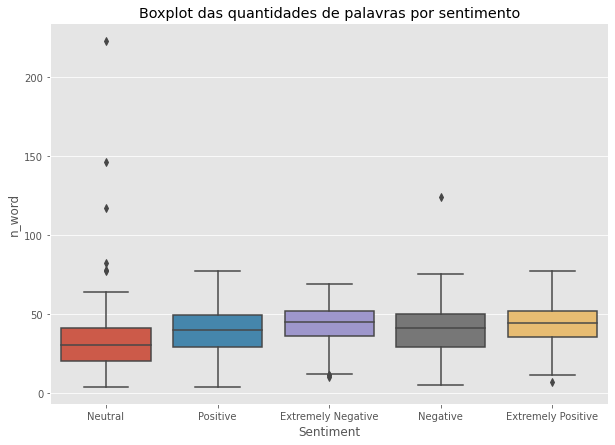

<Figure size 432x288 with 0 Axes>

In [ ]:
#Boxplot das quantidade de palavras por sentimento
plt.figure(figsize=(10,7))
plt.title("Boxplot das quantidades de palavras por sentimento")
sns.boxplot(data=df, x="Sentiment", y="n_word")
plt.show()
plt.clf()

#Análise de sentimento 

##Na análise de sentimento será utilizado o TfidfVectorizer para criar matrix com os tweets, será utilizado o ENGLISH_STOP_WORD e acrescentado outros termos. Será utilizado o modelo de MultinomialNB

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
#Importando o TfidfVectorizer e ENGLISH_STOP_WORDS e acrescendo outros termos para stop words
from sklearn.feature_extraction.text import TfidfVectorizer,ENGLISH_STOP_WORDS
meus_stop = ENGLISH_STOP_WORDS.union(['@','https','co',"ifz9fan2pa","i2nlzdxno8","xx6ghgfzcc","i2nlzdxno8","x92","https","https co"])

# Criando o vetor
vect = TfidfVectorizer(stop_words=meus_stop, ngram_range=(1, 2), max_features=10000, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(df.OriginalTweet)
# criando a matrix
X = vect.transform(df.OriginalTweet)

# Criando o dataframe
tweets_transformados = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: \n', tweets_transformados.head())

Top 5 rows of the DataFrame: 
    abc  abcnews  ability  able  ...  zombie apocalypse  zombies  zone  zoom
0  0.0      0.0      0.0   0.0  ...                0.0      0.0   0.0   0.0
1  0.0      0.0      0.0   0.0  ...                0.0      0.0   0.0   0.0
2  0.0      0.0      0.0   0.0  ...                0.0      0.0   0.0   0.0
3  0.0      0.0      0.0   0.0  ...                0.0      0.0   0.0   0.0
4  0.0      0.0      0.0   0.0  ...                0.0      0.0   0.0   0.0

[5 rows x 10000 columns]


In [ ]:
tweets_transformados

,abc,abcnews,ability,able,able buy,able stock,able supermarket,able work,abroad,absolute,absolutely,absurd,abt,abuja,abuse,abused,abusing,accc,accelerate,accelerated,accelerating,accept,acceptable,accepted,accepting,access,access food,access online,accessible,accommodation,according,account,accounts,accurate,accused,achieve,acknowledge,act,act like,acted,...,year old,year year,years,years ago,years coronavirus,years old,yeast,yell,yelled,yellow,yep,yes,yesterday,yo,york,york city,yorkers,yorkshire,young,young people,younger,youth,youtube,youâ,youâ ll,youâ ve,yoy,yr,yr old,yrs,yyc,yâ,zealand,zero,zimbabwe,zombie,zombie apocalypse,zombies,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.197835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sentimentos=df['Sentiment']

In [ ]:
sentimentos.head(10)

0               Neutral
1              Positive
2              Positive
3              Positive
4    Extremely Negative
5              Positive
6              Positive
7               Neutral
8              Positive
9              Negative
Name: Sentiment, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets_transformados, sentimentos, test_size=0.2, random_state=42)

In [ ]:
modelo = MultinomialNB()
modelo.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred=modelo.predict(X_test)
print(y_pred)

['Negative' 'Negative' 'Positive' ... 'Positive' 'Neutral' 'Negative']


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score=accuracy_score(y_test, y_pred)
print(score)

0.4574829931972789
